In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv(r"C:\Users\pubal\Downloads\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


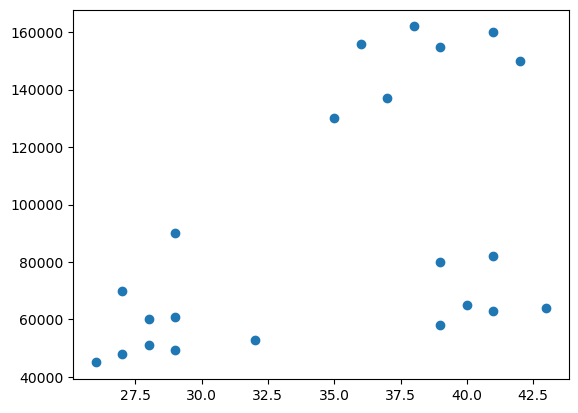

In [9]:
plt.scatter(df['Age'],df['Income($)'])

In [10]:
#scaling the values of age and income to obtain accurate centroids
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,70000
1,Michael,0.176471,90000
2,Mohan,0.176471,61000
3,Ismail,0.117647,60000
4,Kory,0.941176,150000


In [11]:
#scaling the income to obtain an accurate centroid
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


C:\Users\pubal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pubal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pubal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pubal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

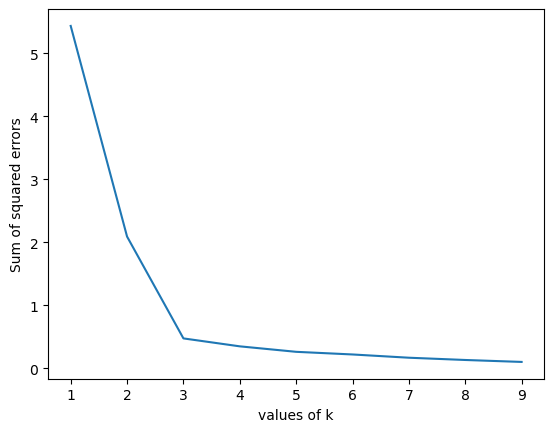

In [13]:
#finding the value of k for the kmeans to happen using elbow plot technique
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans( n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
#now since the above block of codes or numeric results are not always preferred. Hence we will plot a graph using matplotlib to show k
plt.xlabel('values of k')
plt.ylabel('Sum of squared errors')
plt.plot(k_range,sse)

In [14]:
#So the above graph clarifies that our elbow is 3. Hence the number of clusters in our dataplot or the value of k will be 3
km = KMeans(n_clusters=3)
score = km.fit_predict(df[['Age','Income($)']])
y_pred = score

C:\Users\pubal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pubal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [21]:
#df0 = df[df['cluster']==0]
#df1 = df[df['cluster']==1]
#df2 = df[df['cluster']==2]
km.cluster_centers_


array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

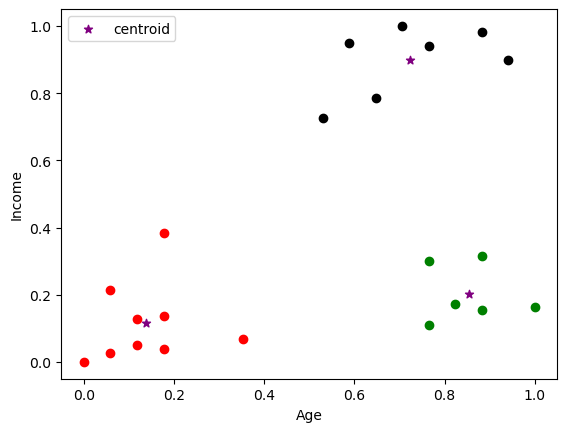

In [24]:
plt.scatter(df0['Age'],df0['Income($)'],color = 'red')
plt.scatter(df1['Age'],df1['Income($)'],color = 'black')
plt.scatter(df2['Age'],df2['Income($)'],color = 'green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker = '*',label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [ ]:
#the above is the actual representation of the KMeans that we did to our project with the centroids exactly at the centre of each cluster.

In the above exercise first we  completed the minmaxscaler to scale value range between 0 and 1.
Then we completed the Kmeans classifier and represented our result in a scatter plot.